# Business Problem

Analyze the data and generate insights that could help Netflix decide which type of shows/movies to produce and how to grow the business.

# importing required libraries

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\chapp\Downloads\netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [218]:
df.shape# dimensions of data

(8807, 12)

In [219]:
df.columns# name of columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
show_id         8807 non-null object
type            8807 non-null object
title           8807 non-null object
director        6173 non-null object
cast            7982 non-null object
country         7976 non-null object
date_added      8797 non-null object
release_year    8807 non-null int64
rating          8803 non-null object
duration        8804 non-null object
listed_in       8807 non-null object
description     8807 non-null object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [221]:
df.describe(include='object').T

,count,unique,top,freq
show_id,8807,8807,s377,1
type,8807,2,Movie,6131
title,8807,8804,Feb-09,2
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [222]:
df["type"].value_counts(dropna=False)

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [223]:
df["title"].value_counts(dropna=False)

Feb-09                             2
15-Aug                             2
22-Jul                             2
Trimurti                           1
In Too Deep                        1
                                  ..
Celebrity Marriage                 1
Murder Among the Mormons           1
Chelsea                            1
Weapon of Choice                   1
The Sound of Your Heart: Reboot    1
Name: title, Length: 8804, dtype: int64

In [224]:
df["director"].value_counts(dropna=False)

NaN                              2634
Rajiv Chilaka                      19
Raúl Campos, Jan Suter             18
Marcus Raboy                       16
Suhas Kadav                        16
                                 ... 
Raam Reddy                          1
Van M. Pham                         1
Manny Rodriguez, Jay Lavender       1
Kaila York                          1
Robert Schwentke                    1
Name: director, Length: 4529, dtype: int64

In [225]:
df["cast"].value_counts(dropna=False)

NaN                                                                                                                                                                                                     825
David Attenborough                                                                                                                                                                                       19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                                  14
Samuel West                                                                                                                                                                                              10
Jeff Dunham                                                                                                                                                                             

In [226]:
df["country"].value_counts(dropna=False)

United States                             2818
India                                      972
NaN                                        831
United Kingdom                             419
Japan                                      245
                                          ... 
Canada, Spain                                1
Spain, Germany, Denmark, United States       1
Portugal, United States                      1
Denmark, Spain                               1
Lebanon, Qatar                               1
Name: country, Length: 749, dtype: int64

In [227]:
df["date_added"].value_counts(dropna=False)

January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
April 17, 2015         1
April 15, 2014         1
June 29, 2020          1
July 13, 2019          1
November 12, 2017      1
Name: date_added, Length: 1768, dtype: int64

In [228]:
df["release_year"].value_counts(dropna=False)

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1961       1
1925       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [229]:
df["rating"].value_counts(dropna=False)

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NaN            4
UR             3
NC-17          3
74 min         1
66 min         1
84 min         1
Name: rating, dtype: int64

In [230]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [231]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [232]:
df['type'].value_counts(normalize=True)*100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

# Data Visualization

# Checking if there any Duplicate value present in the Dataset or not

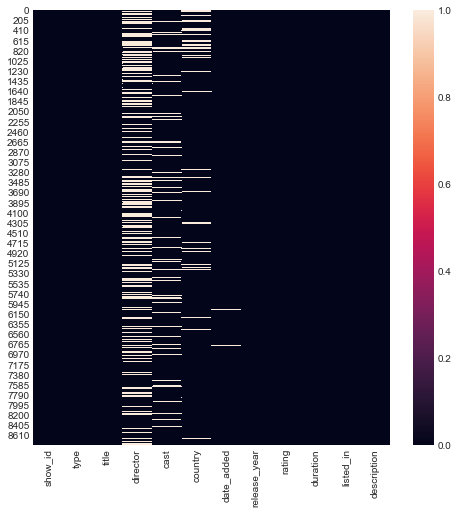

In [233]:
plt.figure(figsize = (8, 8))
sns.heatmap(df.isnull())

Plotting Histogram the no. of Movies vs no. of TV Shows in the Netflix Library

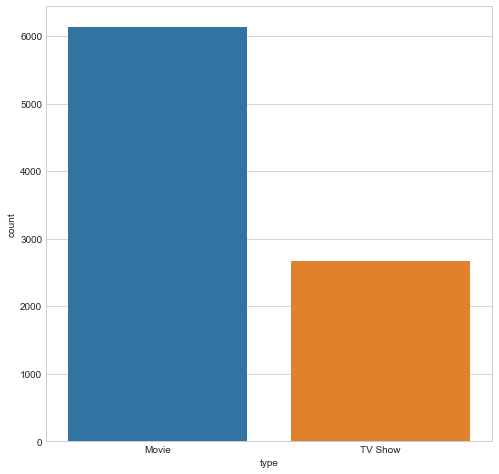

In [234]:
plt.figure(figsize = (8, 8))
sns.countplot(df["type"])

Pie chart of the percentage of Movies and TV shows in TV Library

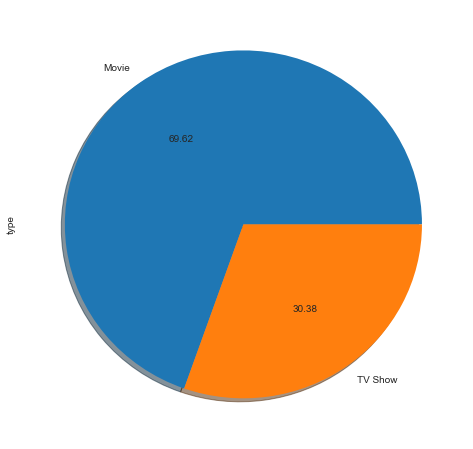

In [235]:
plt.figure(figsize = (8, 8))
df['type'].value_counts().plot(kind='pie',autopct="%.2f",shadow=True)

Code for visualising Number of movies releasing per year

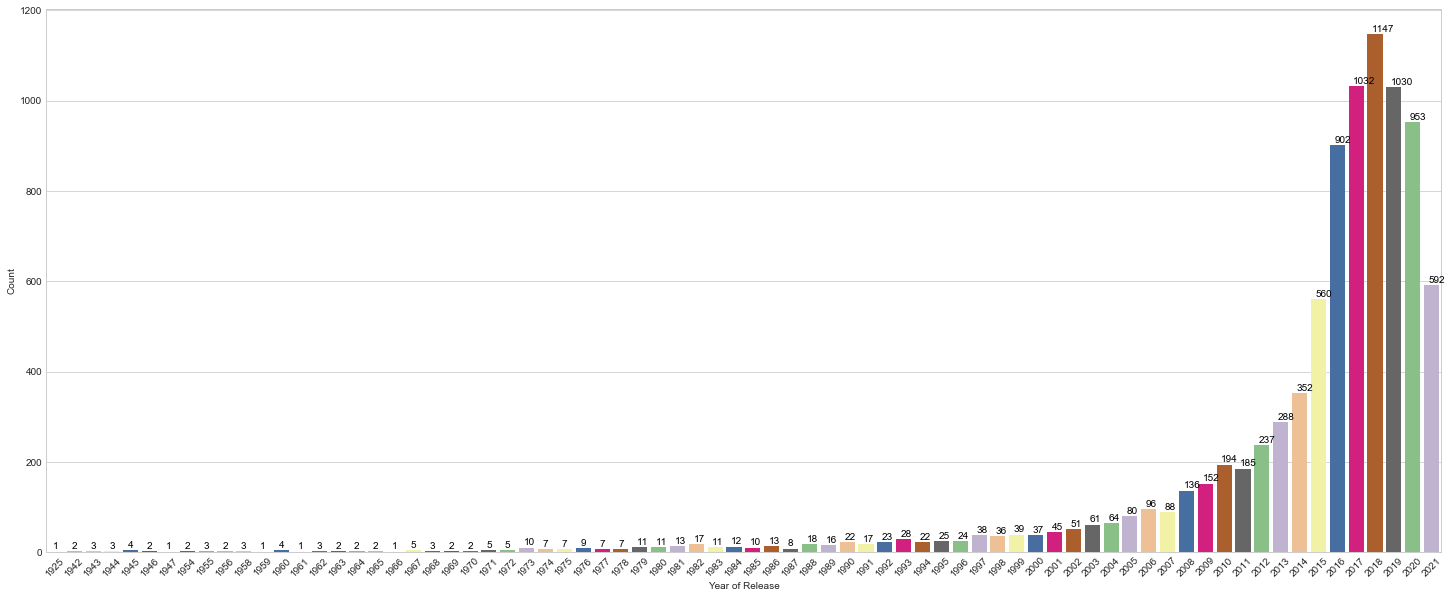

In [236]:
plt.figure(figsize = (25, 10))
a = sns.countplot(x = 'release_year', data = df, palette = "Accent")
plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.xticks(rotation = 45)
for i in a.patches:
    a.annotate(int(i.get_height()), (i.get_x()+0.25, i.get_height()+1), va = 'bottom', color = 'black')

# Code to Check no. of Ratings in each category for Movies and TV Shows

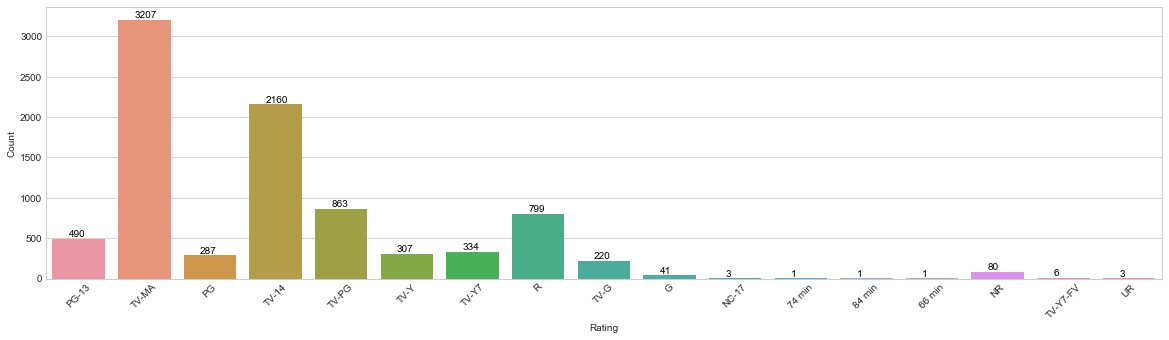

In [237]:
plt.figure(figsize = (20, 5))
ax = sns.countplot(x = 'rating', data = df)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

In [238]:
constraint=df['cast'].apply(lambda x: str(x).split(',')).tolist()
constraint

[['nan'],
 ['Ama Qamata',
  ' Khosi Ngema',
  ' Gail Mabalane',
  ' Thabang Molaba',
  ' Dillon Windvogel',
  ' Natasha Thahane',
  ' Arno Greeff',
  ' Xolile Tshabalala',
  ' Getmore Sithole',
  ' Cindy Mahlangu',
  ' Ryle De Morny',
  ' Greteli Fincham',
  ' Sello Maake Ka-Ncube',
  ' Odwa Gwanya',
  ' Mekaila Mathys',
  ' Sandi Schultz',
  ' Duane Williams',
  ' Shamilla Miller',
  ' Patrick Mofokeng'],
 ['Sami Bouajila',
  ' Tracy Gotoas',
  ' Samuel Jouy',
  ' Nabiha Akkari',
  ' Sofia Lesaffre',
  ' Salim Kechiouche',
  ' Noureddine Farihi',
  ' Geert Van Rampelberg',
  ' Bakary Diombera'],
 ['nan'],
 ['Mayur More',
  ' Jitendra Kumar',
  ' Ranjan Raj',
  ' Alam Khan',
  ' Ahsaas Channa',
  ' Revathi Pillai',
  ' Urvi Singh',
  ' Arun Kumar'],
 ['Kate Siegel',
  ' Zach Gilford',
  ' Hamish Linklater',
  ' Henry Thomas',
  ' Kristin Lehman',
  ' Samantha Sloyan',
  ' Igby Rigney',
  ' Rahul Kohli',
  ' Annarah Cymone',
  ' Annabeth Gish',
  ' Alex Essoe',
  ' Rahul Abburi',
  ' Ma

In [239]:
newdf=pd.DataFrame(constraint,index=df['title'])
newdf

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,Chloë Sevigny,...,None,None,None,None,None,None,None,None,None,None
Zombie Dumb,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Zombieland,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [240]:
newdf=newdf.stack()
newdf

title                  
Dick Johnson Is Dead  0                       nan
Blood & Water         0                Ama Qamata
                      1               Khosi Ngema
                      2             Gail Mabalane
                      3            Thabang Molaba
                                    ...          
Zubaan                3          Manish Chaudhary
                      4              Meghna Malik
                      5             Malkeet Rauni
                      6            Anita Shabdish
                      7     Chittaranjan Tripathy
Length: 64951, dtype: object

In [241]:
newdf=pd.DataFrame(newdf)
newdf

0
title                                         
Dick Johnson Is Dead 0                     nan
Blood & Water        0              Ama Qamata
                     1             Khosi Ngema
                     2           Gail Mabalane
                     3          Thabang Molaba
...                                        ...
Zubaan               3        Manish Chaudhary
                     4            Meghna Malik
                     5           Malkeet Rauni
                     6          Anita Shabdish
                     7   Chittaranjan Tripathy

[64951 rows x 1 columns]

In [242]:
newdf.reset_index(inplace=True)
newdf=newdf[['title',0]]
newdf.columns=['title','cast']
newdf

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [243]:
dfcast=df.merge(newdf,on="title",how='inner')

In [244]:
dfcast

,show_id,type,title,director,cast_x,country,date_added,release_year,rating,duration,listed_in,description,cast_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",nan
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64996,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Manish Chaudhary
64997,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Meghna Malik
64998,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Malkeet Rauni
64999,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Anita Shabdish


In [245]:
x=pd.DataFrame(dfcast.groupby('cast_y')['title'].count())
x.reset_index(inplace=True)
x

,cast_y,title
0,Jr.,2
1,"""Riley"" Lakdhar Dridi",1
2,'Najite Dede,1
3,2 Chainz,1
4,2Mex,1
...,...,...
39292,İbrahim Büyükak,1
39293,İbrahim Çelikkol,1
39294,Şahin Irmak,1
39295,Şükrü Özyıldız,1


In [246]:
sorteddf = x.sort_values(by = 'title', ascending = False)
sorteddf

,cast_y,title
39283,nan,825
2612,Anupam Kher,39
26941,Rupa Bhimani,31
30303,Takahiro Sakurai,30
15541,Julie Tejwani,28
...,...,...
15291,João Fábio Cabral,1
15290,João Côrtes,1
15289,João Assunção,1
15288,Joziah Lagonoy,1


Top Directors

In [270]:
df['director'].value_counts()

Rajiv Chilaka                    19
Raúl Campos, Jan Suter           18
Suhas Kadav                      16
Marcus Raboy                     16
Jay Karas                        14
                                 ..
Raam Reddy                        1
Van M. Pham                       1
Manny Rodriguez, Jay Lavender     1
Kaila York                        1
Greg Mottola                      1
Name: director, Length: 4528, dtype: int64

# Number of movies released per country

In [271]:
df['country'].value_counts()

United States                              2818
India                                       972
United Kingdom                              419
Japan                                       245
South Korea                                 199
                                           ... 
Denmark, France, United States, Sweden        1
Canada, Spain                                 1
Spain, Germany, Denmark, United States        1
Portugal, United States                       1
United States, Hungary, Ireland, Canada       1
Name: country, Length: 748, dtype: int64

# Pattern recognition for adding content every year.

In [248]:
df['year'] = pd.DatetimeIndex(df['date_added']).year
dfyear16=df[df['year']==2016.0]
dfyear16['type'].value_counts()

Movie      253
TV Show    176
Name: type, dtype: int64

In [264]:
dfyear16.shape

(429, 13)

In [249]:
dfyear16['rating'].value_counts()

TV-MA       162
TV-14        98
TV-PG        50
TV-Y7        43
NR           27
R            14
TV-Y         10
TV-G          9
PG-13         6
PG            3
G             2
66 min        1
NC-17         1
TV-Y7-FV      1
84 min        1
Name: rating, dtype: int64

In [273]:
dfyear16['country'].value_counts()

United States                                                                                               159
United Kingdom                                                                                               37
Taiwan                                                                                                       24
Japan                                                                                                        16
Canada                                                                                                       12
                                                                                                           ... 
India, United Kingdom                                                                                         1
Denmark, Indonesia, Finland, Norway, United Kingdom, Israel, France, United States, Germany, Netherlands      1
France, United States, Canada                                                                           

In [250]:
dfyear17=df[df['year']==2017.0]
dfyear17['type'].value_counts()

Movie      839
TV Show    349
Name: type, dtype: int64

In [265]:
dfyear17.shape

(1188, 13)

In [256]:
dfyear17['rating'].value_counts()

TV-MA       446
TV-14       326
TV-PG       168
R            66
TV-Y7        45
TV-Y         35
PG-13        26
NR           24
TV-G         23
PG           19
G             4
UR            1
TV-Y7-FV      1
74 min        1
NC-17         1
Name: rating, dtype: int64

In [275]:
dfyear17['country'].value_counts()

United States                                     362
India                                             142
United Kingdom                                     96
South Korea                                        40
Canada                                             35
                                                 ... 
United States, Venezuela                            1
United Kingdom, France, United States, Belgium      1
Singapore, France                                   1
Spain, Germany                                      1
France, United Kingdom, India                       1
Name: country, Length: 177, dtype: int64

In [251]:
dfyear18=df[df['year']==2018.0]
dfyear18['type'].value_counts()

Movie      1237
TV Show     412
Name: type, dtype: int64

In [257]:
dfyear18['rating'].value_counts()

TV-MA       650
TV-14       451
TV-PG       184
R           129
PG-13        53
TV-Y7        45
TV-Y         40
TV-G         36
PG           33
NR           14
G            12
TV-Y7-FV      1
Name: rating, dtype: int64

In [262]:
dfyear18.shape

(1649, 13)

In [276]:
dfyear18['country'].value_counts()

United States                                          451
India                                                  333
United Kingdom                                          77
Hong Kong                                               40
Japan                                                   36
                                                      ... 
Canada, Germany, France, United States                   1
United States, United Kingdom, Spain, South Korea        1
United Arab Emirates, United States, United Kingdom      1
United Kingdom, Germany                                  1
Belgium, United Kingdom, United States                   1
Name: country, Length: 216, dtype: int64

In [252]:
dfyear19=df[df['year']==2019.0]
dfyear19['type'].value_counts()

Movie      1424
TV Show     592
Name: type, dtype: int64

In [260]:
dfyear19['rating'].value_counts()

TV-MA       736
TV-14       494
R           208
TV-PG       198
PG-13       135
PG           81
TV-Y7        54
TV-Y         54
TV-G         40
G             8
NR            4
UR            2
TV-Y7-FV      1
NC-17         1
Name: rating, dtype: int64

In [263]:
dfyear19.shape

(2016, 13)

In [277]:
dfyear19['country'].value_counts()

United States                     677
India                             203
United Kingdom                    102
Japan                              58
Egypt                              53
                                 ... 
Switzerland                         1
Spain, France, Italy                1
Germany, United States, Sweden      1
United Kingdom, Thailand            1
Denmark, China                      1
Name: country, Length: 230, dtype: int64

In [253]:
dfyear20=df[df['year']==2020.0]
dfyear20['type'].value_counts()

Movie      1284
TV Show     595
Name: type, dtype: int64

In [259]:
dfyear20['rating'].value_counts()

TV-MA    671
TV-14    439
R        188
TV-PG    146
PG-13    122
TV-Y     102
PG        86
TV-G      61
TV-Y7     55
G          9
Name: rating, dtype: int64

In [267]:
dfyear20.shape

(1879, 13)

In [278]:
dfyear20['country'].value_counts()

United States                                                                 624
India                                                                         189
Japan                                                                          62
United Kingdom                                                                 60
Canada                                                                         48
                                                                             ... 
Lebanon, United States, United Arab Emirates                                    1
Spain, France, United States                                                    1
France, Canada, Italy, United States, China                                     1
United Kingdom, France, United States, Belgium, Luxembourg, China, Germany      1
United States, Hong Kong                                                        1
Name: country, Length: 249, dtype: int64

In [254]:
dfyear21=df[df['year']==2021.0]
dfyear21['type'].value_counts()

Movie      993
TV Show    505
Name: type, dtype: int64

In [261]:
dfyear21['rating'].value_counts()

TV-MA    489
TV-14    326
R        190
PG-13    146
TV-PG     97
TV-Y7     87
PG        58
TV-Y      57
TV-G      44
G          4
Name: rating, dtype: int64

In [268]:
dfyear21.shape

(1498, 13)

In [279]:
dfyear16['country'].value_counts()

United States                                                                                               159
United Kingdom                                                                                               37
Taiwan                                                                                                       24
Japan                                                                                                        16
Canada                                                                                                       12
                                                                                                           ... 
India, United Kingdom                                                                                         1
Denmark, Indonesia, Finland, Norway, United Kingdom, Israel, France, United States, Germany, Netherlands      1
France, United States, Canada                                                                           

# Recommendations:
1.Every year the added content rated as 'TV-MA','TV-14'  is kept at a constant proportion and as per the recent trends adding movies need to be decreased slightly,keeping the TV Shows added per year nearly same as previous year.
2.USA,India,UK are the countries to be considered while adding shows every year.
3.Most watched shows(from the recent years) are to be made available in the other languages in which there are more shows available.